## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
import copy

## 2. Import Final Data

In [2]:
final_train_data = pd.read_csv('final_train_data.csv', sep = ',')
final_test_data = pd.read_csv('final_test_data.csv', sep = ',')

In [7]:
final_train_data.head()

,s12,s21,s20,s13,s8,s3,s7,s17,s2,s15,s4,s11,ttf_fixed
0,521.66,23.4190,39.06,2388.02,2388.06,1589.70,554.36,392,641.82,8.4195,1400.60,47.47,13.820275
1,522.28,23.4236,39.00,2388.07,2388.04,1591.82,553.75,392,642.15,8.4318,1403.14,47.49,13.784049
2,522.42,23.3442,38.95,2388.03,2388.08,1587.99,554.26,390,642.35,8.4178,1404.20,47.27,13.747727
3,522.86,23.3739,38.88,2388.08,2388.11,1582.79,554.45,392,642.35,8.3682,1401.87,47.13,13.711309
4,522.19,23.4044,38.90,2388.04,2388.06,1582.85,554.00,393,642.37,8.4294,1406.22,47.28,13.674794


In [ ]:
final_test_data.head()

In [8]:
X_train = final_train_data[['s12', 's21', 's20', 's13', 's8', 's3', 's17','s7', 's2', 's15', 's4', 's11']]
y_train = final_train_data['ttf_fixed']
X_test = final_test_data[['s12', 's21', 's20', 's13', 's8', 's3', 's17', 's2', 's7', 's15', 's4', 's11']]
y_test = final_test_data['ttf_fixed']                            

## 3. Creat Regression model

In [3]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [4]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [5]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [10]:
#prepare parameters:

# convert dataframes to numpy arrays
X_train_reg = np.array(X_train)
y_train_reg = np.array(y_train)

initial_w = np.zeros(X_train.shape[1])
initial_b = 0

# some gradient descent settings
iterations = 100
alpha = 0.00000001123

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train_reg, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient, alpha, iterations)
                                            
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost    37.56   
Iteration   10: Cost     7.19   
Iteration   20: Cost     6.76   
Iteration   30: Cost     6.75   
Iteration   40: Cost     6.75   
Iteration   50: Cost     6.75   
Iteration   60: Cost     6.75   
Iteration   70: Cost     6.75   
Iteration   80: Cost     6.75   
Iteration   90: Cost     6.75   
b,w found by gradient descent: 0.00,[3.00899579e-04 1.36529372e-05 2.27519836e-05 1.36758967e-03
 1.36759198e-03 8.94551745e-04 2.20914449e-04 3.19594330e-04
 3.66707116e-04 4.72491061e-06 7.79044699e-04 2.63804760e-05] 


## 4. Evaluating Model

In [22]:
#evaluating model
weight = w_final
bias= b_final

# convert dataframes to numpy arrays
X_test_reg = np.array(X_test)
y_test_fixed_reg = np.array(y_test)

y_pred=[]
for i in range(X_test_reg.shape[0]):
    # calculate predicted values of ttf
    y_predict = np.dot(X_test_reg[i], weight) + bias
    y_pred.append(y_predict)
    
max(y_pred - y_test_fixed_reg)

9.735130930602722

## 5. Evaluation Metrics

In [13]:
def regression_eval_metrics(actual, predicted):
    
    """Calculate regression evaluation metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    return df_regr_metrics


In [26]:
from sklearn import metrics
get_reg_metrics = regression_eval_metrics(y_test, y_pred)
get_reg_metrics

,0
Root Mean Squared Error,3.669171
Mean Absolute Error,2.941565
Explained Variance,-0.002014


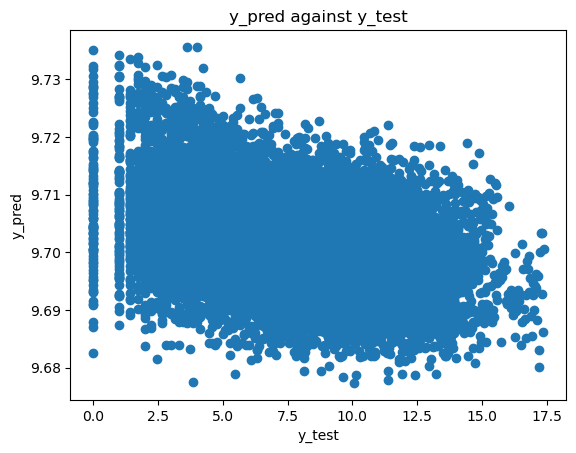

In [27]:
import matplotlib.pyplot as plt
fig = plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred against y_test')
plt.show()